In [59]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from eofs.standard import Eof 
import random

In [60]:
df=pd.read_csv('Compiled_InSAR.csv', sep=',',header=None)       # reading the .csv files and converting to dataframe
east_matrix = np.array(df.to_numpy())                        #convert to numpy array
east_matrix = east_matrix.T                        # take transpose
m = len(east_matrix)                        #rows
n = len(east_matrix[0])                     #columns
east_matrix = np.nan_to_num(east_matrix)    #fill NaN with 0
org_matrix=east_matrix                        #store the current matrix as org_matrix
print(east_matrix)
print(m)
print(n)

[[-2.020e+00  1.200e+00 -1.000e-02  2.610e+00 -1.300e-01  1.270e+00
   1.970e+00  4.470e+00  4.390e+00  5.050e+00  5.270e+00  4.950e+00
   5.700e+00  6.130e+00  6.580e+00  7.560e+00  8.030e+00  8.230e+00
   7.380e+00  9.060e+00  9.630e+00  9.940e+00  1.080e+01  1.112e+01
   1.206e+01  1.269e+01  1.233e+01  1.320e+01  1.392e+01  1.415e+01
   1.969e+01  2.162e+01  2.291e+01  2.590e+01  2.673e+01  2.651e+01
   2.716e+01  2.771e+01  3.063e+01  3.195e+01  3.554e+01  3.581e+01
   3.876e+01  3.772e+01  3.659e+01  4.016e+01  4.019e+01  4.070e+01
   4.119e+01  4.381e+01  4.274e+01  4.347e+01  4.370e+01  4.419e+01
   4.471e+01  4.420e+01  4.233e+01  4.566e+01  4.590e+01  4.585e+01
   4.788e+01  4.770e+01  4.795e+01  4.840e+01  4.839e+01  4.952e+01]
 [-2.130e+00  1.290e+00 -6.700e-01  2.700e+00 -8.800e-01  1.510e+00
   1.720e+00  4.660e+00  4.510e+00  4.910e+00  5.330e+00  5.090e+00
   5.680e+00  6.680e+00  6.780e+00  7.480e+00  8.190e+00  8.220e+00
   7.440e+00  9.090e+00  9.480e+00  9.800e+00  

In [61]:
l=[]
for j in range(n):
    sum=0.0
    count=0
    for i in range(m):
        sum+=east_matrix[i][j]
        count+=1
    sum/=count
    l.append(sum)
    for i in range(m):
        if(east_matrix[i][j]!=0):
            east_matrix[i][j]-=sum

In [62]:
"""
Example of reconstructing the matrix using 6 components
"""
solver = Eof(east_matrix) 
components=6
pcs=solver.pcs(pcscaling = 0 , npcs=components)
eofs=solver.eofs(eofscaling = 0, neofs=components)
new_matrix = np.matmul(pcs,eofs)  
print(new_matrix)

[[ 1.62566378e-01 -2.64124699e-01  1.02422642e+00  5.41813963e-01
   8.96235720e-01  4.91046457e-01  1.36262825e-02 -4.99521714e-02
  -1.84248307e-01 -1.45324971e-01 -3.36117464e-01 -3.01496920e-01
   1.84705372e-02 -6.67660863e-01  2.77158007e-01  4.32632103e-01
   2.04912589e-01  4.88803378e-01  2.05759133e-01  2.42258044e-01
   5.58577450e-01  8.30492195e-01  6.24104687e-01  1.14331602e+00
   7.91600781e-01  4.92762547e-01  9.41882565e-01  1.30500303e+00
   1.15086531e+00  1.01968237e+00  2.18479746e+00  1.67449122e+00
   8.97487763e-01  1.08186528e+00  1.14666909e+00  1.71932479e-01
   1.97027363e+00  1.99263796e+00  1.15908327e+00  1.67913085e+00
  -8.52491095e-01  1.46799140e-01  8.32627993e-02  1.98085568e-01
   1.02771009e+00  5.19831202e+00  5.06722457e+00  5.60474483e+00
   4.81683245e+00  5.15494981e+00  4.23021620e+00  5.00000470e+00
   4.70065945e+00  4.77992762e+00  4.89408029e+00  4.77395348e+00
   4.24781948e+00  4.69264894e+00  4.90830788e+00  5.83236830e+00
   5.08214

In [63]:
eigenvalues =  solver.varianceFraction()
eigenvalue1 = solver.varianceFraction(neigs=18)

In [64]:
print(eigenvalue1.shape) #shape of numpy array for 99 components

(13,)


In [65]:
sum=0.0
for i in range(len(eigenvalue1)):
    sum+=eigenvalue1[i]
print(sum)   #total variance- will be 1.00

1.0


In [66]:
"""
finding the % of variance explained by each component 
"""
for i in range(len(eigenvalue1)):  
    eigenvalue1[i]*=100
    eigenvalue1[i]/=sum
x=np.round(eigenvalue1,decimals=3)
print(x) # 6 components seems to be enough to cover t|he variance

[9.7363e+01 1.9900e+00 4.9000e-01 1.0100e-01 3.2000e-02 8.0000e-03
 7.0000e-03 3.0000e-03 2.0000e-03 1.0000e-03 1.0000e-03 0.0000e+00
 0.0000e+00]


1.2834873457988296


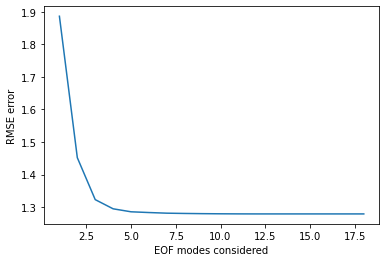

In [67]:
"""
plotting the RMSE error vs the number of EOF modes considered

Clearly, the error becomes 
"""
x_components=[]
y_error=[]
for k in range(18):
    totalerror=0.0
    pcs=solver.pcs(pcscaling = 0 , npcs=k+1)
    eofs=solver.eofs(eofscaling = 0, neofs=k+1)
    new_matrix = np.matmul(pcs,eofs)  
    for i in range(m):
        for j in range(n):
            totalerror+=(east_matrix[i][j]-new_matrix[i][j])**2
    x_components.append(k+1)
    y_error.append((totalerror/(m*n))**0.5)
plt.xlabel("EOF modes considered")
plt.ylabel("RMSE error")
plt.plot(x_components,y_error)
print(y_error[5])

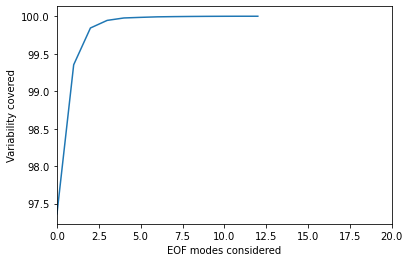

In [68]:
"""
plotting the variance expressed vs the no. of EOF modes considered
6 EOF modes are enough for expressing ~100% variance.
"""
variance_covered=0.0
y=[]
x=[]
for i in range(len(eigenvalue1)):
    variance_covered+=eigenvalue1[i]
    y.append(variance_covered)
    x.append(i)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
scale_factor=20
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.xlabel("EOF modes considered")
plt.ylabel("Variability covered")
plt.plot(x,y)
#plot of variance covered v/s the number of components taken. we see graph flats out at approx 10-15 components.
#so we'll fix number of components to 12

In [69]:
print(east_matrix)

[[-2.07692308e-02 -2.31538462e-01  1.28076923e+00  5.88461538e-01
   9.85384615e-01  6.20000000e-01  2.00000000e-01 -5.38461538e-02
  -1.20000000e-01  3.84615385e-02 -1.00000000e-01 -1.83846154e-01
   1.51538462e-01 -6.50769231e-01  1.00769231e-01  5.12307692e-01
   2.56153846e-01  6.06153846e-01  2.73076923e-01  3.45384615e-01
   6.28461538e-01  9.80000000e-01  8.04615385e-01  1.23307692e+00
   7.59230769e-01  4.18461538e-01  9.66153846e-01  1.45000000e+00
   1.15923077e+00  8.89230769e-01  1.56230769e+00  1.21307692e+00
   8.51538462e-01  7.26153846e-01  9.76153846e-01  1.96230769e+00
   1.85538462e+00  1.83307692e+00  1.26307692e+00  1.74769231e+00
   3.89615385e+00  4.89153846e+00  5.23615385e+00  5.17769231e+00
   3.56769231e+00  5.39615385e+00  5.22923077e+00  5.83153846e+00
   4.87230769e+00  5.29461538e+00  4.33923077e+00  5.01230769e+00
   4.69615385e+00  4.86615385e+00  4.99846154e+00  4.85230769e+00
   3.45000000e+00  4.52230769e+00  4.82846154e+00  5.89692308e+00
   5.06846

In [70]:
print(org_matrix)

[[-2.07692308e-02 -2.31538462e-01  1.28076923e+00  5.88461538e-01
   9.85384615e-01  6.20000000e-01  2.00000000e-01 -5.38461538e-02
  -1.20000000e-01  3.84615385e-02 -1.00000000e-01 -1.83846154e-01
   1.51538462e-01 -6.50769231e-01  1.00769231e-01  5.12307692e-01
   2.56153846e-01  6.06153846e-01  2.73076923e-01  3.45384615e-01
   6.28461538e-01  9.80000000e-01  8.04615385e-01  1.23307692e+00
   7.59230769e-01  4.18461538e-01  9.66153846e-01  1.45000000e+00
   1.15923077e+00  8.89230769e-01  1.56230769e+00  1.21307692e+00
   8.51538462e-01  7.26153846e-01  9.76153846e-01  1.96230769e+00
   1.85538462e+00  1.83307692e+00  1.26307692e+00  1.74769231e+00
   3.89615385e+00  4.89153846e+00  5.23615385e+00  5.17769231e+00
   3.56769231e+00  5.39615385e+00  5.22923077e+00  5.83153846e+00
   4.87230769e+00  5.29461538e+00  4.33923077e+00  5.01230769e+00
   4.69615385e+00  4.86615385e+00  4.99846154e+00  4.85230769e+00
   3.45000000e+00  4.52230769e+00  4.82846154e+00  5.89692308e+00
   5.06846

In [71]:
"""
Refining the matrix obtained after reconstructing with 12 EOF modes.
beta value (value for convergence) has been set to 1e-6. 
You can decrease it if you want a more refined value
"""
temp_matrix=org_matrix
comp_considered=5
for k in range(comp_considered):
    while(1):
        solver=Eof(temp_matrix)
        pcs=solver.pcs(pcscaling=0,npcs=k+1)
        eofs=solver.eofs(eofscaling=0,neofs=k+1)
        x_ = np.matmul(pcs,eofs)
        for i in range(m):
            for j in range(n):
                if(org_matrix[i][j] != 0):
                    x_[i][j]=org_matrix[i][j]
        error=x_ - temp_matrix
        error=np.square(error)
        var1=np.sum(error)
        error2=np.square(x_)
        var2=np.sum(error2)
        temp_matrix=x_
        #print(k+1, var1/var2)
        #print(x_[10][35])
        
        if(var1/var2 < 0.00005):
            break
print(temp_matrix)

[[-2.07692308e-02 -2.31538462e-01  1.28076923e+00  5.88461538e-01
   9.85384615e-01  6.20000000e-01  2.00000000e-01 -5.38461538e-02
  -1.20000000e-01  3.84615385e-02 -1.00000000e-01 -1.83846154e-01
   1.51538462e-01 -6.50769231e-01  1.00769231e-01  5.12307692e-01
   2.56153846e-01  6.06153846e-01  2.73076923e-01  3.45384615e-01
   6.28461538e-01  9.80000000e-01  8.04615385e-01  1.23307692e+00
   7.59230769e-01  4.18461538e-01  9.66153846e-01  1.45000000e+00
   1.15923077e+00  8.89230769e-01  1.56230769e+00  1.21307692e+00
   8.51538462e-01  7.26153846e-01  9.76153846e-01  1.96230769e+00
   1.85538462e+00  1.83307692e+00  1.26307692e+00  1.74769231e+00
   3.89615385e+00  4.89153846e+00  5.23615385e+00  5.17769231e+00
   3.56769231e+00  5.39615385e+00  5.22923077e+00  5.83153846e+00
   4.87230769e+00  5.29461538e+00  4.33923077e+00  5.01230769e+00
   4.69615385e+00  4.86615385e+00  4.99846154e+00  4.85230769e+00
   3.45000000e+00  4.52230769e+00  4.82846154e+00  5.89692308e+00
   5.06846

In [72]:
print(org_matrix) #orginal matrix with missing values


[[-2.07692308e-02 -2.31538462e-01  1.28076923e+00  5.88461538e-01
   9.85384615e-01  6.20000000e-01  2.00000000e-01 -5.38461538e-02
  -1.20000000e-01  3.84615385e-02 -1.00000000e-01 -1.83846154e-01
   1.51538462e-01 -6.50769231e-01  1.00769231e-01  5.12307692e-01
   2.56153846e-01  6.06153846e-01  2.73076923e-01  3.45384615e-01
   6.28461538e-01  9.80000000e-01  8.04615385e-01  1.23307692e+00
   7.59230769e-01  4.18461538e-01  9.66153846e-01  1.45000000e+00
   1.15923077e+00  8.89230769e-01  1.56230769e+00  1.21307692e+00
   8.51538462e-01  7.26153846e-01  9.76153846e-01  1.96230769e+00
   1.85538462e+00  1.83307692e+00  1.26307692e+00  1.74769231e+00
   3.89615385e+00  4.89153846e+00  5.23615385e+00  5.17769231e+00
   3.56769231e+00  5.39615385e+00  5.22923077e+00  5.83153846e+00
   4.87230769e+00  5.29461538e+00  4.33923077e+00  5.01230769e+00
   4.69615385e+00  4.86615385e+00  4.99846154e+00  4.85230769e+00
   3.45000000e+00  4.52230769e+00  4.82846154e+00  5.89692308e+00
   5.06846

In [73]:
for i in range(m):
    for j in range(n):
        temp_matrix[i][j]+=l[j]
print(temp_matrix)

[[-2.02000000e+00  1.20000000e+00 -1.00000000e-02  2.61000000e+00
  -1.30000000e-01  1.27000000e+00  1.97000000e+00  4.47000000e+00
   4.39000000e+00  5.05000000e+00  5.27000000e+00  4.95000000e+00
   5.70000000e+00  6.13000000e+00  6.58000000e+00  7.56000000e+00
   8.03000000e+00  8.23000000e+00  7.38000000e+00  9.06000000e+00
   9.63000000e+00  9.94000000e+00  1.08000000e+01  1.11200000e+01
   1.20600000e+01  1.26900000e+01  1.23300000e+01  1.32000000e+01
   1.39200000e+01  1.41500000e+01  1.96900000e+01  2.16200000e+01
   2.29100000e+01  2.59000000e+01  2.67300000e+01  2.65100000e+01
   2.71600000e+01  2.77100000e+01  3.06300000e+01  3.19500000e+01
   3.55400000e+01  3.58100000e+01  3.87600000e+01  3.77200000e+01
   3.65900000e+01  4.01600000e+01  4.01900000e+01  4.07000000e+01
   4.11900000e+01  4.38100000e+01  4.27400000e+01  4.34700000e+01
   4.37000000e+01  4.41900000e+01  4.47100000e+01  4.42000000e+01
   4.23300000e+01  4.56600000e+01  4.59000000e+01  4.58500000e+01
   4.78800

<h3> The assignment ends here.</h3>
<h4>
    Below is a test on the cross validation set showing the correctness of the EOF based gap filling method.
</h4>


   A submatrix of size 5 * 5 is taken from the original data set and 5 values are randomly set to 0.
   Number of ideal components are select to express maximum variance.
   The iterative refinement is done and finally the obtained values are compared with the original values.

-beta is set to 1e-04<br>
-number of components to cover maximum variance is taken to be 3

In [74]:
cross_valid_set=np.zeros((5,5))
new_org_matrix=np.zeros((5,5))
t=[]
for i in range(5):
    for j in range(5):
        cross_valid_set[i][j]=org_matrix[i][j]
        new_org_matrix[i][j]=org_matrix[i][j]
for i in range(5):
    a=random.randint(0,4)
    b=random.randint(0,4)
    t.append((a,b))
    new_org_matrix[a][b]=0
    cross_valid_set[a][b]=0
l=[]
for j in range(5):
    sum=0.0
    count=0
    for i in range(5):
        sum+=cross_valid_set[i][j]
        count+=1
    sum/=count
    l.append(sum)
    for i in range(5):
        if(cross_valid_set[i][j]!=0):
            cross_valid_set[i][j]-=sum
print(cross_valid_set)

[[-0.07       -0.18430769  0.502       0.06769231  0.        ]
 [-0.18       -0.09430769 -0.158       0.          0.        ]
 [ 0.11        0.22569231 -0.768       0.20769231 -0.39676923]
 [ 0.25        0.00569231  0.442       0.09769231  0.        ]
 [-0.11        0.         -0.018       0.14769231  0.31323077]]


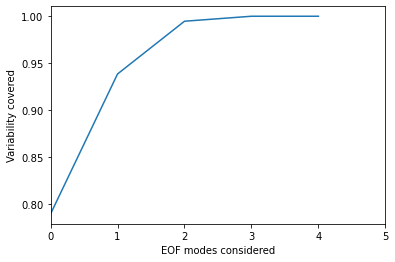

In [75]:
"""
plotting the variance expressed vs the no. of EOF modes considered
6 EOF modes are enough for expressing ~100% variance.
"""
solver=Eof(cross_valid_set)
eigenvalues =  solver.varianceFraction()
eigenvalue1 = solver.varianceFraction(neigs=18)
variance_covered=0.0
y=[]
x=[]
for i in range(len(eigenvalue1)):
    variance_covered+=eigenvalue1[i]
    y.append(variance_covered)
    x.append(i)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
scale_factor=5
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.xlabel("EOF modes considered")
plt.ylabel("Variability covered")
plt.plot(x,y)
#plot of variance covered v/s the number of components taken. we see graph flats out at approx 10-15 components.
#so we'll fix number of components to 12

In [76]:
temp_matrix= cross_valid_set
comp_considered=3
for k in range(comp_considered):
    while(1):
        solver=Eof(temp_matrix)
        pcs=solver.pcs(pcscaling=0,npcs=k+1)
        eofs=solver.eofs(eofscaling=0,neofs=k+1)
        x_ = np.matmul(pcs,eofs)
        for i in range(5):
            for j in range(5):
                if(new_org_matrix[i][j] != 0):
                    x_[i][j]=new_org_matrix[i][j]
        error=x_ - temp_matrix
        error=np.square(error)
        var1=np.sum(error)
        error2=np.square(x_)
        var2=np.sum(error2)
        temp_matrix=x_
        #print(k+1, var1/var2)
        #print(x_[10][35])
        
        if(var1/var2 < 0.00001):
            break
print(temp_matrix)

[[-0.02076923 -0.23153846  1.28076923  0.58846154  0.66841327]
 [-0.13076923 -0.14153846  0.62076923 -2.60269025 -1.01754904]
 [ 0.15923077  0.17846154  0.01076923  0.72846154 -0.42461538]
 [ 0.29923077 -0.04153846  1.22076923  0.61846154  0.50416502]
 [-0.06076923 -0.01081314  0.76076923  0.66846154  0.28538462]]


In [77]:
for i in range(len(t)):
    print(org_matrix[t[i][0]][t[i][1]]+l[t[i][1]] , temp_matrix[t[i][0]][t[i][1]]+l[t[i][1]])

0.9575384615384616 0.64056712080256
1.199230769230769 -2.081921018024839
0.2075384615384616 -1.0453951963298356
1.2075384615384617 0.4763188653940612
-0.1487692307692313 -0.05804390493608371
